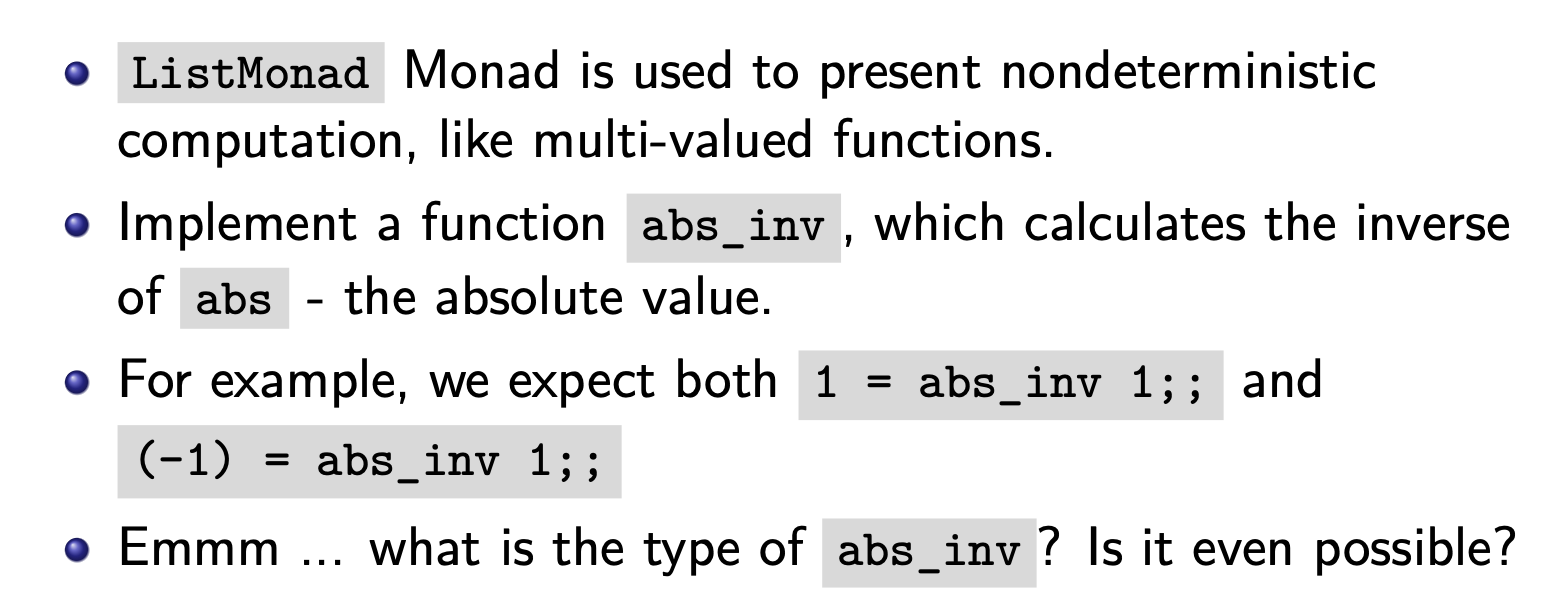

In [51]:
module type Monad = sig
  type 'a t 
  val return : 'a -> 'a t
  val ( >>= ): 'a t -> ('a -> 'b t) -> 'b t (*bind*)
end;;


module ListMonad : Monad with
  type 'a t = 'a list = struct
  type 'a t = 'a list
  let return x = [x]
  let rec (>>=) lst f = 
    match lst with
    | [] -> []
    | h::t -> (f h) @ (t >>= f)
end;;




module type Monad =
  sig
    type 'a t
    val return : 'a -> 'a t
    val ( >>= ) : 'a t -> ('a -> 'b t) -> 'b t
  end


module ListMonad :
  sig
    type 'a t = 'a list
    val return : 'a -> 'a t
    val ( >>= ) : 'a t -> ('a -> 'b t) -> 'b t
  end


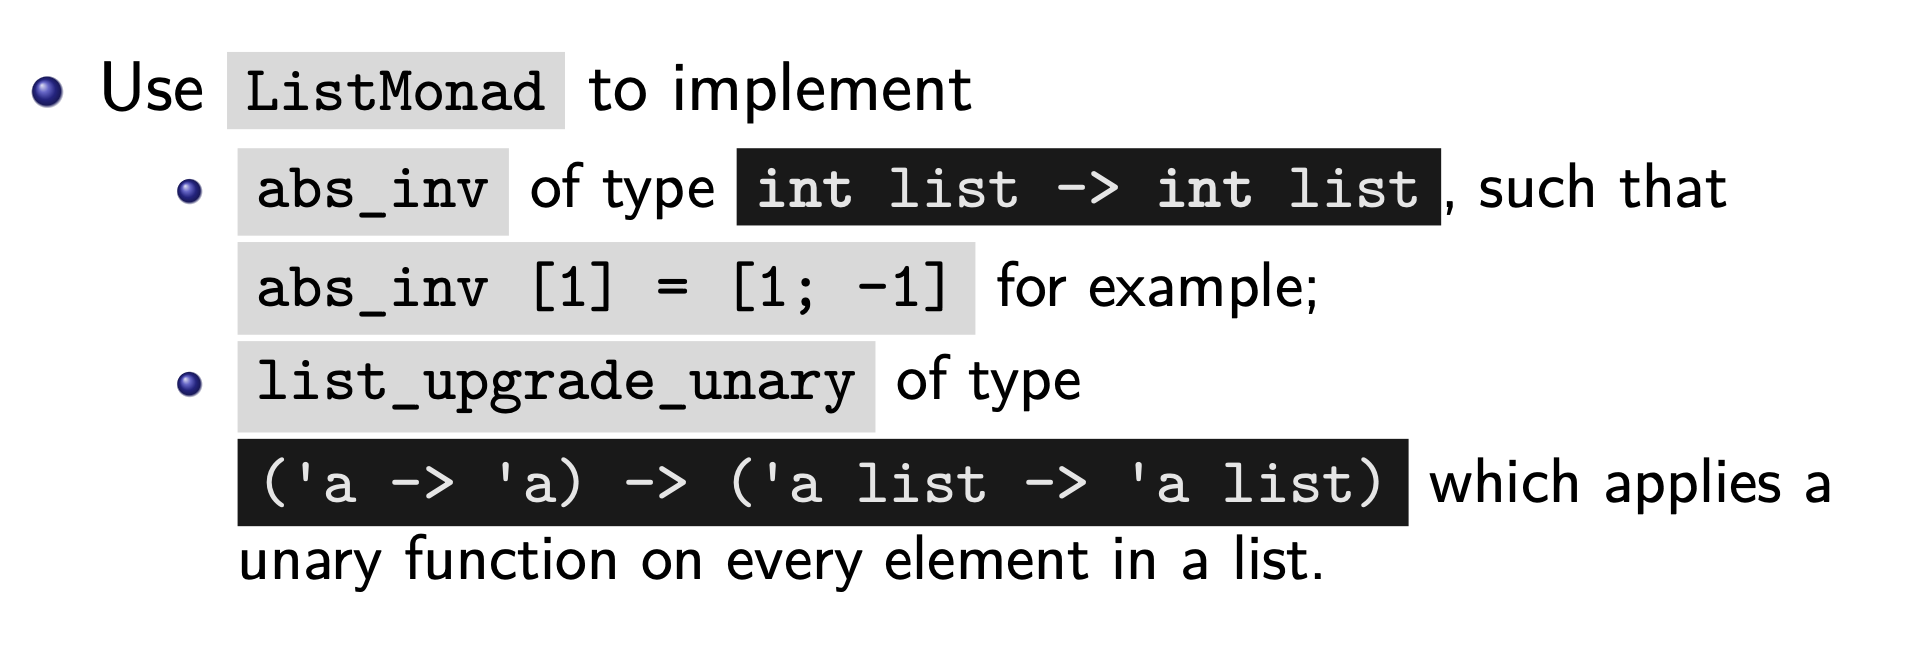

In [44]:
open ListMonad;;

let abs_inv x = ListMonad.(>>=) x (fun a -> [a;(-a)]);;  

let list_upgrade_unary f x = ListMonad.(>>=) x (fun a -> ListMonad.return (f a));;


let neg x = -x;;
let neg_up = list_upgrade_unary neg;;



val abs_inv : int ListMonad.t -> int ListMonad.t = <fun>


val list_upgrade_unary : ('a -> 'b) -> 'a ListMonad.t -> 'b ListMonad.t =
  <fun>


val neg : int -> int = <fun>


val neg_up : int ListMonad.t -> int ListMonad.t = <fun>


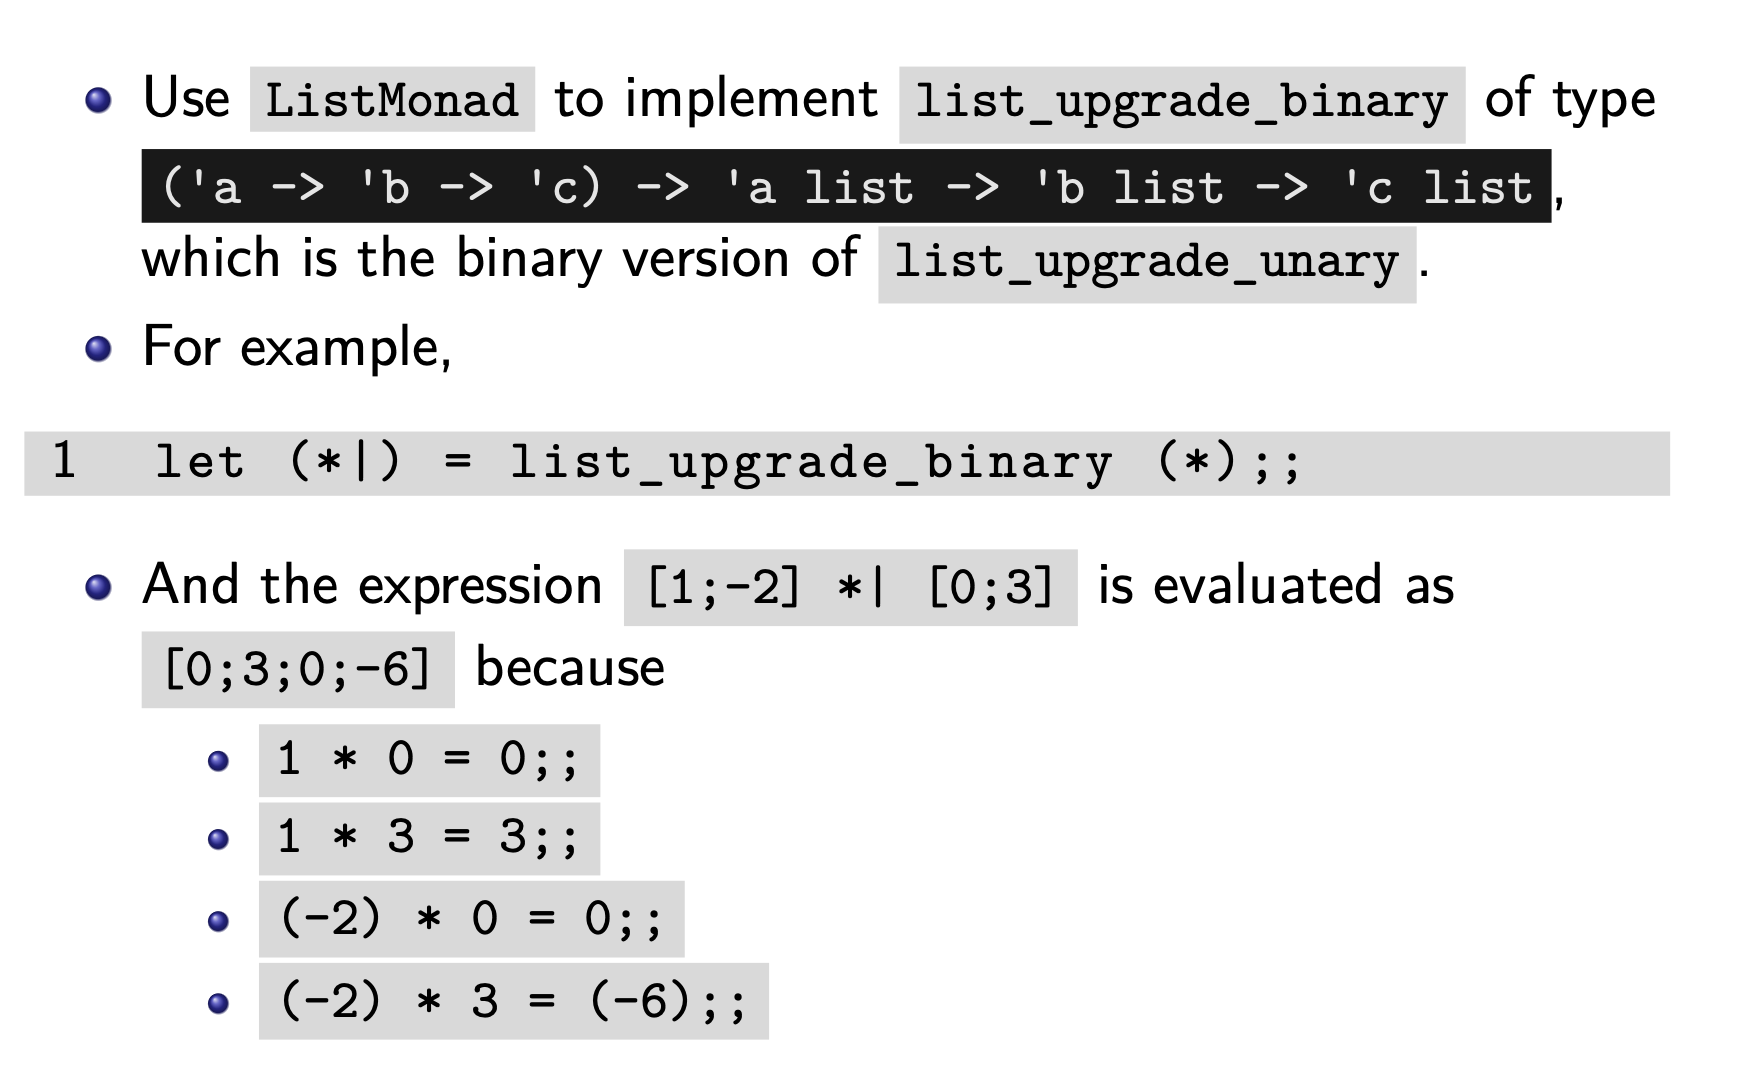

In [59]:
module type Monad = sig
  type 'a t 
  val return : 'a -> 'a t
  val ( >>= ): 'a t -> ('a -> 'b t) -> 'b t
end;;

module ListMonad : Monad with
  type 'a t = 'a list = struct
  type 'a t = 'a list
  let return x = [x]
  let rec (>>=) lst f = 
    match lst with
    | [] -> []
    | h::t -> (f h) @ (t >>= f)
end;;

open ListMonad;;


let list_return_binary (op : int -> int -> int) (x : int) (y : int) : int list =
  ListMonad.return (op x y);;


let list_upgrade_binary (op : int -> int -> int) (x : int list) (y : int list) : int list =
  x >>= (fun a -> 
    y >>= (fun b -> list_return_binary op a b));;

let ( *| ) : int list -> int list -> int list = list_upgrade_binary ( * );;

[1; -2] *| [0; 3];;


module type Monad =
  sig
    type 'a t
    val return : 'a -> 'a t
    val ( >>= ) : 'a t -> ('a -> 'b t) -> 'b t
  end


module ListMonad :
  sig
    type 'a t = 'a list
    val return : 'a -> 'a t
    val ( >>= ) : 'a t -> ('a -> 'b t) -> 'b t
  end


val list_return_binary : (int -> int -> int) -> int -> int -> int list =
  <fun>


val list_upgrade_binary :
  (int -> int -> int) -> int list -> int list -> int list = <fun>


val ( *| ) : int list -> int list -> int list = <fun>


- : int list = [0; 3; 0; -6]


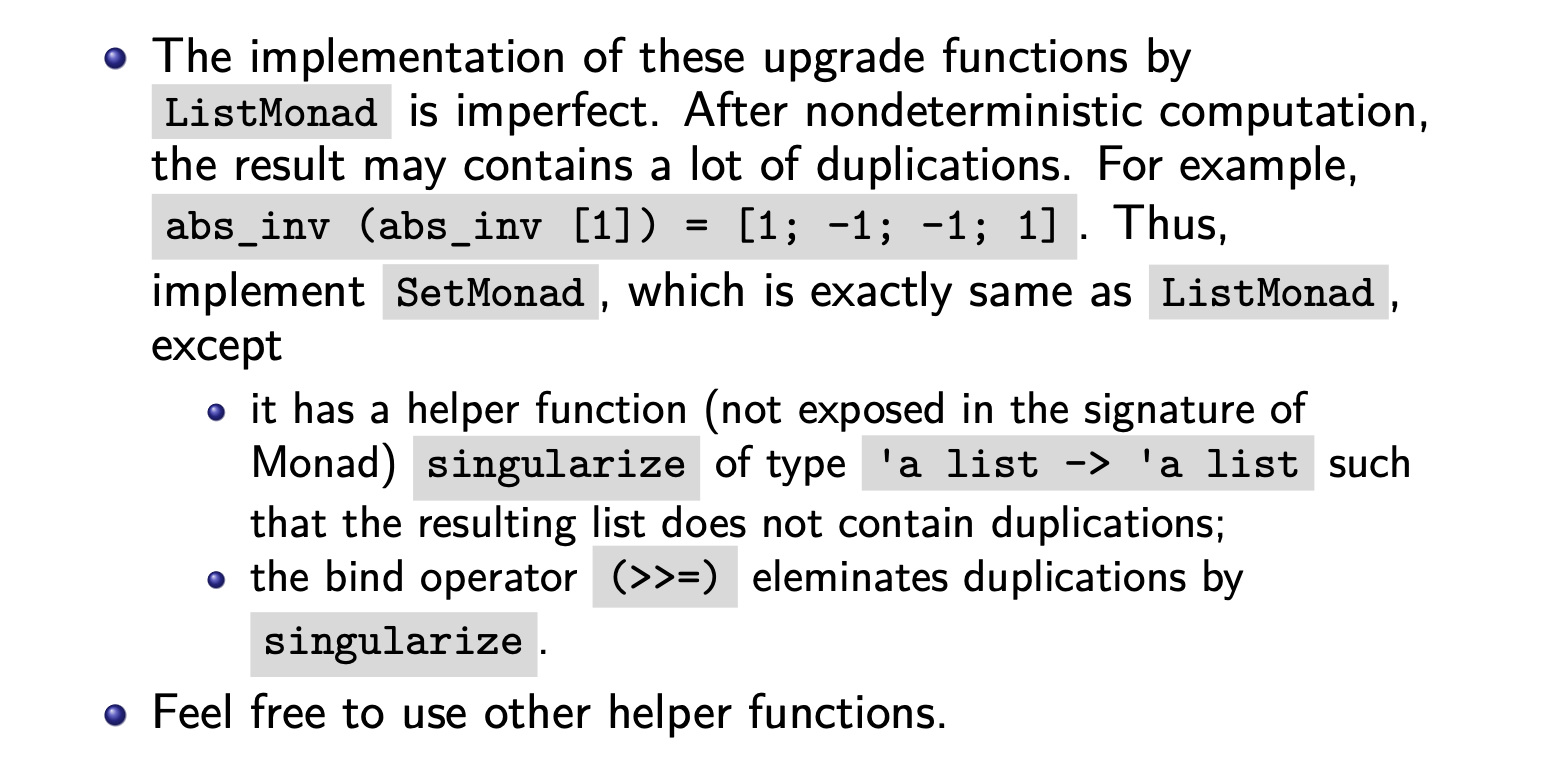

In [ ]:
module type Monad = sig
  type 'a t 
  val return : 'a -> 'a t
  val ( >>= ): 'a t -> ('a -> 'b t) -> 'b t
end;;


let rec filter f lst =
  match lst with
  | [] -> []
  | x::xs -> if f x then x :: filter f xs
             else filter f xs
;;

let rec singularize lst =
  match lst with
  | [] -> []
  | x::xs ->
      x :: singularize (filter (fun y -> y <> x) xs)
;;

module SetMonad : Monad with
  type 'a t = 'a list = struct
  type 'a t = 'a list
  let return x = [ x]
  let rec (>>=) lst f = 
    match lst with
    | [] -> []
    | h::t -> singularize ((f h) @ (t >>= f))
end;;

open SetMonad;;

let abs_inv x = ( >>= ) x (fun a -> [a;(-a)]);;  

abs_inv (abs_inv [1]);;




module type Monad =
  sig
    type 'a t
    val return : 'a -> 'a t
    val ( >>= ) : 'a t -> ('a -> 'b t) -> 'b t
  end


val filter : ('a -> bool) -> 'a list -> 'a list = <fun>


val singularize : 'a list -> 'a list = <fun>


module SetMonad :
  sig
    type 'a t = 'a list
    val return : 'a -> 'a t
    val ( >>= ) : 'a t -> ('a -> 'b t) -> 'b t
  end


val abs_inv : int ListMonad.t -> int ListMonad.t = <fun>


- : int ListMonad.t = [1; -1; -1; 1]
